In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset

In [4]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

 76996608/170498071 ━━━━━━━━━━━━━━━━━━━━ 28:07 18us/step

KeyboardInterrupt: 

In [ ]:
X_test.shape

In [ ]:
X_train[0]

In [ ]:
y_train.shape ## y is the label here

In [ ]:
y_train[:5]

#y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [ ]:
y_train = y_train.reshape(-1,) # 1st dimension as it is so -1 and 2nd one we need to flattened to leave it blank
y_train[:5]

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
plt.imshow(X_train[1])

In [ ]:
plt.figure(figsize=(15,3))
plt.imshow(X_train[1])


# Let's plot some images to see what they are

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,3))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [ ]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [ ]:
X_train[0]

In [ ]:
X_train[0]/255

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# # Now let us build a convolutional neural network to train our images

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(), # shape dite hbe nh.nij teke figure out kre nibe
    layers.Dense(64, activation='relu'),## dence e hcche fully connected layer
    layers.Dense(10, activation='softmax')# softmax will normalize the probability
])

In [ ]:
cnn.summary()

In [ ]:
sigmoid let say we have 2 value
1|0.45
2|0.67
in sigmoid we will get as it is 
but in softmax:
1|(0.45)/(0.45+0.67)
2|(0.67)/(0.45+0.67)
thus in softmax we are normalizing the value between 0 and 1

In [108]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [110]:
cnn.fit(X_train, y_train, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 56s 33ms/step - loss: 1.4944 - accuracy: 0.4582
Epoch 2/3
1563/1563 [==============================] - 51s 32ms/step - loss: 1.1448 - accuracy: 0.5986
Epoch 3/3
1563/1563 [==============================] - 54s 34ms/step - loss: 1.0129 - accuracy: 0.6480


# CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [112]:
cnn.evaluate(X_test,y_test) # y_test tai accuracy

313/313 [==============================] - 5s 13ms/step - loss: 1.0556 - accuracy: 0.6366


[1.0556142330169678, 0.6366000175476074]

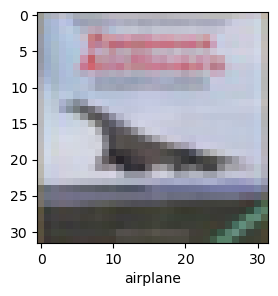

In [113]:
plot_sample(X_test, y_test,3)

In [114]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 13ms/step


array([[3.4088497e-03, 1.0878207e-03, 3.2299806e-03, 4.4029525e-01,
        1.5781560e-03, 2.4933200e-01, 2.5761856e-02, 5.1995134e-04,
        2.7341360e-01, 1.3725191e-03],
       [1.7857553e-02, 1.4973423e-01, 2.5050629e-05, 3.1788994e-05,
        2.9208968e-05, 5.2452339e-07, 1.2553105e-06, 1.0633548e-05,
        8.2922637e-01, 3.0834319e-03],
       [2.2548463e-02, 1.6909204e-01, 7.5410400e-04, 2.3707617e-03,
        6.8372610e-04, 2.9482887e-04, 2.2078220e-04, 2.0127762e-03,
        7.7253097e-01, 2.9491574e-02],
       [2.5265494e-01, 4.5712106e-02, 6.6209701e-03, 3.1814285e-04,
        1.3469937e-03, 2.2049693e-05, 2.7952497e-04, 1.6688190e-04,
        6.9101304e-01, 1.8654077e-03],
       [7.4007944e-04, 1.0994269e-03, 4.0518556e-02, 1.1474434e-01,
        3.3994237e-01, 8.2061134e-02, 4.1526359e-01, 2.2983828e-03,
        2.8143865e-03, 5.1766192e-04]], dtype=float32)

In [115]:
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

NameError: name 'classification_report' is not defined

In [117]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 4s 13ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.65      0.66      1000
           1       0.71      0.82      0.76      1000
           2       0.59      0.40      0.47      1000
           3       0.54      0.36      0.43      1000
           4       0.67      0.49      0.56      1000
           5       0.53      0.61      0.57      1000
           6       0.71      0.76      0.73      1000
           7       0.69      0.71      0.70      1000
           8       0.55      0.90      0.69      1000
           9       0.71      0.69      0.70      1000

    accuracy                           0.64     10000
   macro avg       0.64      0.64      0.63     10000
weighted avg       0.64      0.64      0.63     10000

